In [221]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(0)
d = 5 #no. of features
n = 200 #no of datapoints

X = rng.standard_normal(size=(n, d)) #Draw sample from normal distribution
w_star = np.ones(d)
y = np.dot(X, w_star) + 0.5 * rng.standard_normal(size=n)
print("X shape: ",X.shape)
print('w shape: ',w_star.shape) #number of parameters to fit
print('y shape: ',y.shape)
# rng

X shape:  (200, 5)
w shape:  (5,)
y shape:  (200,)


In [198]:
def ols_estimator(X, y):
    """
	Return the OLS estimator.
	The only built in Numpy functions you are allowed to use are np.linalg.solve and
	np.dot (or equivalent matrix multiplication syntax such as np.matmul).
	Note you are not allowed to use np.linalg.inv.
	You should return a Numpy array of shape (d,).
	"""
    A=np.dot(X.T,X)
    B=np.dot(X.T,y)
    beta=np.linalg.solve(A,B)
    return beta
	

In [200]:
def ridge_estimator(X, y, lamb):
    """
	Return the ridge regression estimator with regularization parameter lamb.
	The only built in Numpy functions you are allowed to use are np.linalg.solve and
	np.dot (or equivalent matrix multiplication syntax such as np.matmul).
	Note you are not allowed to use np.linalg.inv.
	
	You should return a Numpy array of shape (d,).
	"""
    A=np.dot(X.T,X)+ (lamb*np.identity(5))
    B=np.dot(X.T,y)
    beta=np.linalg.solve(A,B)
    return beta

	

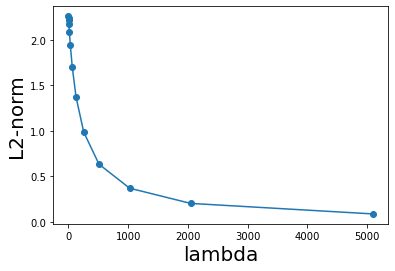

In [202]:
def plot_norm_of_ridge_sol(X, y, lamb_list):
    """

	You do not need to return anything.
	But calling this function should do the following.
	It computes the ridge regression estimator for each lambda in lamb_list. It then
	computes the L2 norm of each of these estimators. Finally, it plots these norms
	on the Y axis against the lambda values on the X axis, and shows this plot.

	You are encouraged to use the function ridge_estimator to help you implement
	this function.
	"""
	
    l2norm_list=np.array([])
    for i in lamb_list:
        beta=ridge_estimator(X,y,i)
        L2_norm=np.sqrt(np.dot(beta,beta))
        l2norm_list=np.append(l2norm_list,L2_norm)


    plt.plot(np.array(lamb_list),l2norm_list,'o-')
    plt.xlabel('lambda',size=20)
    plt.ylabel('L2-norm',size=20)
    plt.savefig('Ques3Part6.png')


"""RUN THIS CODE BLOCK FOR Q6."""
lamb_list = [0, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 5096]
plot_norm_of_ridge_sol(X, y, lamb_list)


In [204]:
def ridge_obj(X, y, lamb, w):
    """

	This function should return the evaluation of the ridge regression objective function
	on the input w.

	You should return a non-negative float.
	"""
    A=0.5*np.dot((np.dot(X,w)-y),(np.dot(X,w)-y))
    B=lamb*np.dot(w,w)
    obj_func=A+B
    return obj_func

	

In [206]:
def ridge_gradient(X, y, lamb, w):
    """

	This function should return the gradient of the ridge regression objective function
	evaluated at the input w.

	You should return a numpy array of shape (d,).
	"""
    grad=np.dot(X.T,(np.dot(X,w)-y)) + 2*lamb*w
    return grad
	

In [208]:
def ridge_gradient_descent(X, y, lamb, eta, iters):
    """

	This function should run gradient descent to compute the ridge regression estimator.

	You should return a Tuple. The first entry of the Tuple is a Numpy array of shape (d,),
	which is the outputted ridge regression estimator found by gradient descent. The second
	entry is a list of length iters (note that iters is an input to this function).
	The t-th entry of this list is the evaluation of the
	t-th gradient descent iterate in the ridge regression objective function.
	"""
    w=np.zeros(d)
    W_list=[]
    obj_list=[]

    for i in range(iters):
        w=w - eta*ridge_gradient(X,y,lamb,w)
        obj_list.append(ridge_obj(X, y, lamb, w))
        W_list.append(w)

    return (np.array(W_list[-1]),obj_list)  

        
    
	

    

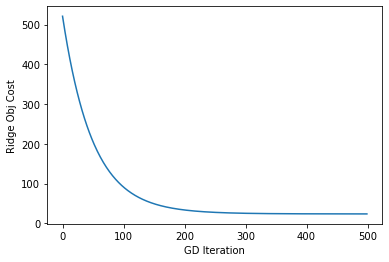

Gap between GD Sol and Analytical Sol: 0.025767498511247683
Gap between GD Sol and True w_star: 0.06896478525377406


In [210]:
lamb = 0.0125
eta = 0.00005
iters = 500
w_gd, gd_costs = ridge_gradient_descent(X, y, lamb, eta, iters)
plt.plot(range(iters), gd_costs)
plt.xlabel("GD Iteration")
plt.ylabel("Ridge Obj Cost")
plt.savefig('Obj.png')
plt.show()
print("Gap between GD Sol and Analytical Sol: " + str(np.linalg.norm(w_gd - ridge_estimator(X, y, lamb))))
print("Gap between GD Sol and True w_star: " + str(np.linalg.norm(w_gd - w_star)))


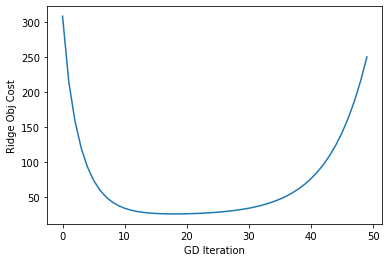

In [212]:
lamb = 0.0125
eta = 0.0085
iters = 50
w_gd, gd_costs = ridge_gradient_descent(X, y, lamb, eta, iters)
plt.plot(range(iters), gd_costs)
plt.xlabel("GD Iteration")
plt.ylabel("Ridge Obj Cost")
plt.savefig('RidgeObj.png')
plt.show()

## How to use rng for uniform sampling??

In [213]:
def ridge_stochastic_gradient(X, y, lamb, w, batch_size, rng):
    """

	Assume that X has n rows.

	This function should use the input rng object to sample without replacement batch_size
	many indices from {0, 1 ... n - 1}. It should then return the gradient of the objective
	function at these sampled indices.

	You should return a numpy array of shape (d,).
	"""

    Xy_column=np.c_[X,y]
    Xy_column=Xy_column[rng.choice(len(X),size=batch_size,replace=False)]
    y_Xy_col=Xy_column[:,-1]
    X_Xy_col=Xy_column[:,0:d]
    grad=(len(X)/batch_size)*(np.dot(X_Xy_col.T,(np.dot(X_Xy_col,w)-y_Xy_col)) + (2*lamb*w))
    return grad
    
    
	

In [218]:
def ridge_stochastic_gd(X, y, lamb, eta, iters, batch_size, rng):
    """

	This function should run stochastic gradient descent to compute the ridge regression estimator.

	You should return a Tuple. The first entry of the Tuple is a Numpy array of shape (d,),
	which is the outputted ridge regression estimator found by stochastic gradient descent. The second
	entry is a list of length iters. The t-th entry of this list is the evaluation of the
	t-th stochastic gradient descent iterate in the ridge regression objective function.
	"""
    w=np.zeros(d)
    W_list=[]
    obj_list=[]
    for i in range(iters):
        w=w - eta*(ridge_stochastic_gradient(X, y, lamb, w, batch_size, rng))
        obj_list.append(ridge_obj(X, y, lamb, w))
        W_list.append(w)
    return (np.array(W_list[-1]),obj_list)  


	

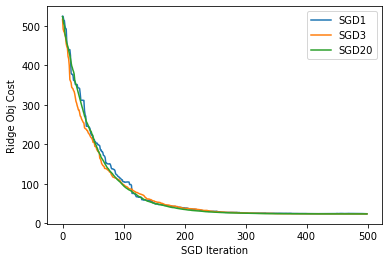

SGD1 Solution: [1.01733492 0.94066834 0.99920999 0.98254588 0.99853575]
SGD3 Solution: [1.01206639 0.92615794 0.99620128 1.01048025 1.0415241 ]
SGD20 Solution: [1.00831874 0.95661579 0.98203339 1.01355173 1.04281116]
Gap between GD Sol and Analytical Sol: 0.032961876192310155


In [220]:
lamb = 0.0125
eta = 0.00005
iters = 500
w_sgd_batch1, sgd_costs_batch1 = ridge_stochastic_gd(X, y, lamb, eta, iters, batch_size=1, rng=rng)
w_sgd_batch3, sgd_costs_batch3 = ridge_stochastic_gd(X, y, lamb, eta, iters, batch_size=3, rng=rng)
w_sgd_batch20, sgd_costs_batch20 = ridge_stochastic_gd(X, y, lamb, eta, iters, batch_size=20, rng=rng)
plt.plot(range(iters), sgd_costs_batch1, label="SGD1")
plt.plot(range(iters), sgd_costs_batch3, label="SGD3")
plt.plot(range(iters), sgd_costs_batch20, label="SGD20")
plt.legend()
plt.xlabel("SGD Iteration")
plt.ylabel("Ridge Obj Cost")
plt.savefig('SGD.png')
plt.show()
print("SGD1 Solution: " + str(w_sgd_batch1))
print("SGD3 Solution: " + str(w_sgd_batch3))
print("SGD20 Solution: " + str(w_sgd_batch20))
print("Gap between GD Sol and Analytical Sol: " + str(np.linalg.norm(w_sgd_batch20 - ridge_estimator(X, y, lamb))))
